In [41]:
import numpy as np
import scipy.stats as stats
from scipy import special
import matplotlib.pyplot as plt
import sys
import seaborn as sns

%matplotlib inline

## 1. The Beginner's Game

Code obtained from MCB112 homework 05 was used below to initiate the game and, where applicable, to give solutions to questions. Game initiation functions were built using this code, and probdist functions given were used to compare to the method we were asked to develop for the solutions. 

Note: there is some leftover code from extra work that I attempted to do that is superfluous, but hopefully shouldn't affect the running of the code, or the readability. 

In [42]:
def quincunx_game_initiate_choose(X):
    '''
    Calculates the log posterior probability distribution for a given number of observations, for a known mean and 
    known standard deviation, or an assumed mean and standard deviation. 
    
    Parameters
    ----------
    X: list
        list of observations (i.e. positions on bar)
        
    Returns
    -------
    true_sigma: float
        
    true_mu: float
    
    gridcols: numpy array
    
    gridrows: numpy array
    '''
    
    # Student's tea distribution machine drops observed samples onto the
    # line on the bar: X of them, X[0..nX-1]

    sample_mean  = np.mean(X)
    sample_stdev = np.std(X, ddof = 1)   ## ddof is "degrees of freedom". 0 = population sd; 1 = sample sd.
    
    seed = np.random.randint(0,10000)
    seed = np.random.seed(seed)

    # Set up the 20x21 dart board grid, and the mu and sigma values
    # associated with each grid position.
    
    gridrows = np.linspace( 100.0,   5.0, 20)   # rows i of the grid are sigma, std. dev.
    gridcols = np.linspace(-100.,  100.0, 21)   # columns j of the grid are mu, mean (location)
    nrows    = len(gridrows)
    ncols    = len(gridcols)

    # Student throws a uniformly distributed dart into the grid, and this
    # chooses mu, sigma. These values are unknown to the customers.

    true_row = np.random.randint(0, nrows)    # Note, randint(0,n) samples 0..n-1
    true_col = np.random.randint(0, ncols)

    true_sigma = gridrows[true_row]
    true_mu    = gridcols[true_col]

    # Optional: Print text output
    # (before showing the graph displays)
    
    '''
    print ("Welcome to Student's game night...")
    print ("")
    print ("The RNG seed is {}".format(seed))
    print ("")
    print ("The hidden grid has {} rows for sigma {}..{},".format(nrows, gridrows[0], gridrows[-1]))
    print ("                and {} cols for mu {}..{}.".format(ncols, gridcols[0], gridcols[-1]))
    print ("")
    print ("Student picked grid col = {}, row = {}".format(true_col, true_row))
    print ("and thus mu = {0:.1f}, sigma = {1:.1f}".format(true_mu, true_sigma))
    print ("")
    print ("Student's tea distribution machine shows the customers {} samples:".format(X))
    for sample in X: print("  {0:8.2f}".format(sample))
    print ("")
    print ("which give sample mean: {0:8.2f}".format(sample_mean))
    print ("   and sample std.dev.: {0:8.2f}".format(sample_stdev))
    '''
    
    print("true sigma:", true_sigma)
    print("true mu:", true_mu)

    return true_sigma, true_mu

In [43]:
gridrows = np.linspace( 100.0,   5.0, 20)   # rows i of the grid are sigma, std. dev.
gridcols = np.linspace(-100.,  100.0, 21)   # columns j of the grid are mu, mean (location)

In [44]:
#checking for different values of sigma and mu - perhaps use them later on for plotting, otherwise, just see
#what you get. 
X_true_sig, X_true_mu = quincunx_game_initiate_choose([11.50, -2.32, 9.18])

true sigma: 15.0
true mu: -20.0


In [45]:
def prob_beg_nsmall(X, true_sigma, gridcols):
    '''
    Calculates the log posterior probability distribution for a given number of observations, for a known mean and 
    known standard deviation, or an assumed mean and standard deviation. 

    Parameters
    ----------
    X: numpy array
    
    true_sig: float
    
    gridcols: numpy array
    
    Returns
    -------
    posterior: numpy array
    
    post_unlog: numpy array
    
    '''

    xbar = np.mean(X)
    N    = len(X)

    prob_num = []

    #Probability of observing a given mu value given x
    #mus are uniformly distributed - there are 21
    for u in gridcols:
        prod_pr = 0
        for x in X:
            #calculate the probability of each xi given mu and true sigma
            Pr = stats.norm.logpdf(x, loc=u, scale= true_sigma)
            #take product of each individual probability for xi for P(X|mu, true sigma) 
            prod_pr = prod_pr + Pr
        #for each mu multiply by P(u) - the prior (uniform)
        prob_num.append(prod_pr + np.log(1/np.float(len(gridcols))))

    prob_num = np.array(prob_num)
    z = special.logsumexp(prob_num)

    #calculate P(u|X, true sigma) for each element in prob_num
    posterior = np.subtract(prob_num, z)
    #print("log posterior:", posterior)
    
    post_unlog = np.exp(posterior)
    #print("posterior:", post_unlog)
    
    #Optional: Check that the probabilities sum to 1
    print("sum of prob (should equal 1):", post_unlog.sum())
    
    #check that this is equal to 1, and give the log  
    return post_unlog, posterior, X

In [46]:
#First, calculating the posterior probability for the true sigma and true mu values  specified in the homework: 
small_X = np.array([ 11.50, -2.32, 9.18])
true_mu = float(-20)
true_sigma = float(60)

small_X_post_unlog, small_X_posterior, small_X = prob_beg_nsmall(small_X, true_sigma, gridcols)

sum of prob (should equal 1): 0.9999999999999999


In [47]:
def quincunx_game_initiate_rand(nX):
    '''
    Play a game of quincunx with randomly chosen nX observations. Initializes a 20 x 21 dart board game with 
    mu (mean) and sigma (standard deviation) values as columns and rows, respectively. A position on the board is 
    chosen (randomly), representing the true sigma and true mu values for that round of the game.   
    
    Parameters
    ----------
    nX: int
        number of observations that will be randomly sampled (i.e. positions on line on bar where tea bags are
        being dropped)
    
    Returns
    -------
    
    true_sigma: float
        actual sigma value of observation/dart location on grid (row value)
        
    true_mu: float
        actual mu value of observation/dart location on grid (column value)
    
    gridcols: numpy array
        possible mu values for game (mean/position)
    
    gridrows: numpy array
        possible sigma values for game
    
    '''
    
    seed = np.random.randint(0,10000)
    seed = np.random.seed(seed)

    # Set up the 20x21 dart board grid, and the mu and sigma values
    # associated with each grid position.
    
    gridrows = np.linspace( 100.0,   5.0, 20)   # rows i of the grid are sigma, std. dev.
    gridcols = np.linspace(-100.,  100.0, 21)   # columns j of the grid are mu, mean (location)
    nrows    = len(gridrows)
    ncols    = len(gridcols)

    # Student throws a uniformly distributed dart into the grid, and this
    # chooses mu, sigma. These values are unknown to the customers.

    true_row = np.random.randint(0, nrows)    # Note, randint(0,n) samples 0..n-1
    true_col = np.random.randint(0, ncols)

    true_sigma = gridrows[true_row]
    true_mu    = gridcols[true_col]

    # Student's tea distribution machine drops observed samples onto the
    # line on the bar: nX of them, X[0..nX-1]
    
    X  = np.random.normal(loc=true_mu, scale=true_sigma, size=nX)

    sample_mean  = np.mean(X)
    sample_stdev = np.std(X, ddof = 1)   ## ddof is "degrees of freedom". 0 = population sd; 1 = sample sd.

    # Optional: Print text output
    # (before showing the graph displays)
    
    '''
    print ("Welcome to Student's game night...")
    print ("")
    print ("The RNG seed is {}".format(seed))
    print ("")
    print ("The hidden grid has {} rows for sigma {}..{},".format(nrows, gridrows[0], gridrows[-1]))
    print ("                and {} cols for mu {}..{}.".format(ncols, gridcols[0], gridcols[-1]))
    print ("")
    print ("Student picked grid col = {}, row = {}".format(true_col, true_row))
    print ("and thus mu = {0:.1f}, sigma = {1:.1f}".format(true_mu, true_sigma))
    print ("")
    print ("Student's tea distribution machine shows the customers {} samples:".format(X))
    for sample in X: print("  {0:8.2f}".format(sample))
    print ("")
    print ("which give sample mean: {0:8.2f}".format(sample_mean))
    print ("   and sample std.dev.: {0:8.2f}".format(sample_stdev))
    '''

    print("true sigma:", true_sigma)
    print("true mu:", true_mu)
    
    return true_sigma, true_mu, gridcols, gridrows, X

In [48]:
#try different numbers of observations, see what sigma and mu values look like

rand_100_sigma, rand_100_mu, rand_100_gridcols, rand_100_gridrows, rand_100_X  = quincunx_game_initiate_rand(100)
rand_1000_sigma, rand_1000_mu, rand_1000_gridcols, rand_1000_gridrows, rand_1000_X  = quincunx_game_initiate_rand(1000)
rand_2000_sigma, rand_2000_mu, rand_2000_gridcols, rand_2000_gridrows, rand_2000_X = quincunx_game_initiate_rand(2000)
rand_5000_sigma, rand_5000_mu, rand_5000_gridcols, rand_5000_gridrows, rand_5000_X = quincunx_game_initiate_rand(5000)

#plt.hist(rand_100_gridcols, label='100')
#plt.hist(rand_1000_gridcols, label='1000')
#plt.hist(rand_2000_gridcols, label='2000')
#plt.hist(rand_5000_gridcols, label='5000')

#plt.hist(rand_100_gridrows, label='100')
#plt.hist(rand_1000_gridrows, label='1000')
#plt.hist(rand_2000_gridrows, label='2000')
#plt.hist(rand_5000_gridrows, label='5000')

true sigma: 55.0
true mu: -10.0
true sigma: 45.0
true mu: 20.0
true sigma: 75.0
true mu: -70.0
true sigma: 60.0
true mu: 10.0


In [49]:
def prob_beg_hmc(X, true_sig, gridcols):
    '''
    Calculates the log posterior probability distribution for a given number of observations, for a known mean and 
    known standard deviation, or an assumed mean and standard deviation. 

    Parameters
    ----------
    X: numpy array
    
    true_sig: float
    
    gridcols: numpy array
    
    Returns
    -------
    posterior: numpy array
    
    post_unlog: numpy array
    
    '''
    
    xbar = np.mean(X)
    N    = len(X)

    prob_num = []

    #Probability of observing a given mu value given x
    #mus are uniformly distributed - there are 21
    for u in gridcols:
        prod_pr = 0
        for x in X:
            #calculate the probability of each xi given mu and true sigma
            Pr = stats.norm.logpdf(x, loc=u, scale= true_sigma)
            #take product of each individual probability for xi for P(X|mu, true sigma) 
            prod_pr = prod_pr + Pr
        #for each mu multiply by P(u) - the prior (uniform)
        prob_num.append(prod_pr + np.log(1/np.float(len(gridcols))))

    prob_num = np.array(prob_num)
    z = special.logsumexp(prob_num)

    #calculate P(u|X, true sigma) for each element in prob_num
    posterior = np.subtract(prob_num, z)
    
    post_unlog = np.exp(posterior)
    
    print("sum of prob (should equal 1):", post_unlog.sum(), "log posterior:", posterior, "posterior:", post_unlog)
    
    #check that this is equal to 1 
    return post_unlog, posterior 

In [50]:
#calculate the posterior and keep the exponential version of the log-posterior for plotting with semilogy
#use parameters from initiating the quincunx game with an nX number of random observations and the numpy array X  
#generated from choosing nX number of observations in the quincunx_game_initiate_rand function

post_unlog_rand_100, posterior_rand_100 = prob_beg_hmc(rand_100_X, rand_100_sigma, rand_100_gridcols)
post_unlog_rand_1000, posterior_rand_1000 = prob_beg_hmc(rand_1000_X, rand_1000_sigma, rand_1000_gridcols)
post_unlog_rand_2000, posterior_rand_2000 = prob_beg_hmc(rand_2000_X, rand_2000_sigma, rand_2000_gridcols)
post_unlog_rand_5000, posterior_rand_5000 = prob_beg_hmc(rand_5000_X, rand_5000_sigma, rand_5000_gridcols)

sum of prob (should equal 1): 0.9999999999999633 log posterior: [-141.34016342 -114.74785009  -90.93331453  -69.89655675  -51.63757675
  -36.15637452  -23.45295007  -13.5273034    -6.37943451   -2.0093434
   -0.41703006   -1.6024945    -5.56573672  -12.30675672  -21.8255545
  -34.12213005  -49.19648338  -67.04861449  -87.67852337 -111.08621004
 -137.27167448] posterior: [4.13758524e-62 1.46433990e-50 3.22228002e-40 4.40870561e-31
 3.75046710e-23 1.98374598e-16 6.52398867e-11 1.33403362e-06
 1.69608180e-03 1.34076681e-01 6.59001108e-01 2.01393514e-01
 3.82676024e-03 4.52109326e-06 3.32110126e-10 1.51686597e-15
 4.30763343e-22 7.60600678e-30 8.35028151e-39 5.69996206e-49
 2.41918595e-60]
sum of prob (should equal 1): 1.0000000000000324 log posterior: [-1.97268749e+03 -1.65551908e+03 -1.36612846e+03 -1.10451562e+03
 -8.70680549e+02 -6.64623259e+02 -4.86343747e+02 -3.35842013e+02
 -2.13118057e+02 -1.18171878e+02 -5.10034774e+01 -1.16128544e+01
 -9.14448265e-06 -1.61649417e+01 -6.01076520e+

In [51]:
#The inference rules that Student uses to calculate betting odds
# from: these give him what he thinks are the expected P(mu | x1..xn,
# sigma) distribution.
#
def probdist_beginner(X, sigma, mu_values):
    """ 
    Given an ndarray X_1..X_n, and a known sigma;
    and a list of the mu values in each column;
    return a list of the inferred P(mu | X,sigma) for each column.
    """
    xbar = np.mean(X)
    N    = len(X)
    Pr   = [ stats.norm.pdf(x, loc=xbar, scale= sigma / np.sqrt(N)) for x in mu_values ]  # proportional to std error of the mean
    Z    = sum(Pr)                   # normalization constant
    Pr   = [ p / Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr

def probdist_advanced(X, mu_values):
    """ 
    Given an ndarray X_1..X_n,
    and a list of the mu values in each column;
    return a list of the inferred P(mu | X) for each column.
    """
    xbar = np.mean(X)
    s    = np.std(X, ddof=1)     # note that numpy.sd() by default calculates a population std dev; to get sample std. dev., set ddof=1
    N    = len(X)
    Pr   = [ stats.norm.pdf(x, loc=xbar, scale= s / np.sqrt(N)) for x in mu_values ]  # proportional to std error of the mean
    Z    = sum(Pr)                   # normalization constant
    Pr   = [ p / Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr

def tdist_advanced(X, mu_values):
    """ 
    Given an ndarray X_1..X_n,
    and a list of the mu values in each column;
    return a list of the inferred P(mu | X) for each column,
	according to Student's t distribution with N-1 degrees of freedom.
    """
    N    = len(X)
    t    = [ stats.ttest_1samp(X, mu)[0] for mu in mu_values ]
    Pr   = [ stats.t.pdf(val, N-1) for val in t ]
    Z    = sum(Pr)
    Pr   = [ p / Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr


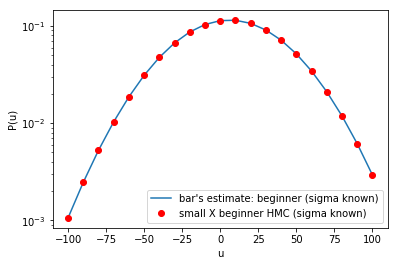

In [52]:
# The bar's rules for determining fair odds.
PrB = probdist_beginner(small_X, true_sigma, gridcols)

# Set up our graphical display. Compare the my results to the bar's. 
plt.semilogy(gridcols, PrB, label="bar's estimate: beginner (sigma known)")
plt.semilogy(gridcols, small_X_post_unlog, "ro", label="small X beginner HMC (sigma known)")

plt.xlabel('u') 
plt.ylabel('P(u)')
plt.legend()
plt.show()

It looks like the method for calculating the odds of guessing the column of the dart location on the grid that I've developed is quite close to the bar's estimate here, at least with a small number of observations; however, as we begin to sample more and more observations, the bar's estimate becomes quite poor, for more observations. 

## 2. The Advanced Game 

In [53]:
def prob_adv_hmc(X, gridcols, gridrows):
    '''
    Takes in observations from a given sample of a quincunx game. Calculates the inferred P(mu | X) for each column,
    returning the log and un_log forms of the posterior disstribution. 
    
    Parameters
    ----------
    X: numpy array
    
    gridrows: numpy array
    
    gridcols: numpy array
    
    Returns
    -------
    posterior: numpy array
    
    post_unlog: numpy array
    
    marginal: numpy array
    
    '''
    
    xbar = np.mean(X)
    N    = len(X)

    prob_num = []
    #Probability of observing a given mu value given x
    #mus are uniformly distributed - there are 21
    for sig in gridrows:
        prob_sig = []
        for u in gridcols:
            prod_pr = 0
            for x in X:
                #calculate the probability of each xi given mu and each sigma
                Pr = stats.norm.logpdf(x, loc=u, scale= sig)
                #take product of each individual probability for xi for P(X|mu, true sigma) 
                prod_pr = prod_pr + Pr
            #for each mu add P(u) - the prior (uniform) - for each sigma, and add (logspace) by each sigma prob
            prob_sig.append(prod_pr + np.log(1/np.float(len(gridcols))) + np.log(1/np.float(len(gridrows))))
        prob_num.append(prob_sig)
    prob_num = np.array(prob_num)
    z = special.logsumexp(prob_num)

    #calculate P(u|X, true sigma) for each element in prob_num
    posterior = np.subtract(prob_num, z)

    post_unlog = np.exp(posterior)
    
    #sum over sigmas to get marginal
    marginal = post_unlog.sum(axis=0)

    #check that this is equal to 1 
    #print("sum of prob (should equal 1):", post_unlog.sum(), "log posterior:", posterior, "posterior:", post_unlog, type(marginal))

    return posterior, post_unlog, marginal

In [54]:
small_X_post_adv, small_X_post_unlog_adv, small_X_marg_adv = prob_adv_hmc(small_X, gridcols, gridrows)

In [55]:
rand_100_post, rand_100_post_unlog, rand_100_marginal = prob_adv_hmc(rand_100_X, rand_100_gridcols, rand_100_gridrows)

In [56]:
rand_1000_post, rand_1000_post_unlog, rand_1000_marginal = prob_adv_hmc(rand_1000_X, rand_1000_gridcols, rand_1000_gridrows)

In [57]:
rand_2000_post, rand_2000_post_unlog, rand_2000_marginal = prob_adv_hmc(rand_2000_X, rand_2000_gridcols, rand_2000_gridrows)

Text(72.528,0.5,'sigma')

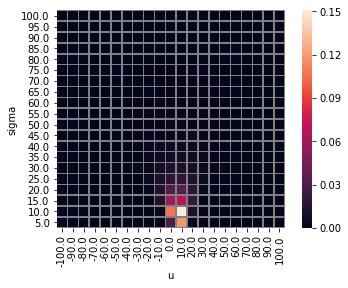

In [58]:
ax = sns.heatmap(small_X_post_unlog_adv,                 # takes a 2D array of data
                 xticklabels=gridcols,  #   ... set custom x axis labels
                 yticklabels=gridrows,  #   ... set custom y axis labels
                 cbar=True,           #   ... turn off the default color scale bar
                 square=True,          #   ... force the plot to be square
                 linecolor='grey',     #   ... set grid line color
                 linewidth=0.5)        #   ... set grid line width
ax.set_xlabel('u')
ax.set_ylabel('sigma')

Text(72.528,0.5,'sigma')

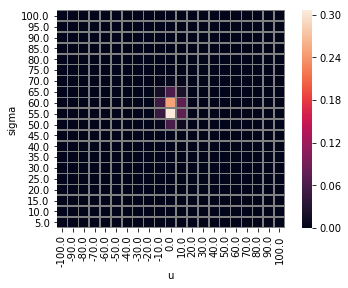

In [59]:
ax = sns.heatmap(rand_100_post_unlog,                 # takes a 2D array of data
                 xticklabels=gridcols,  #   ... set custom x axis labels
                 yticklabels=gridrows,  #   ... set custom y axis labels
                 cbar=True,           #   ... turn off the default color scale bar
                 square=True,          #   ... force the plot to be square
                 linecolor='grey',     #   ... set grid line color
                 linewidth=0.5)        #   ... set grid line width
ax.set_xlabel('u')
ax.set_ylabel('sigma')

Text(72.528,0.5,'sigma')

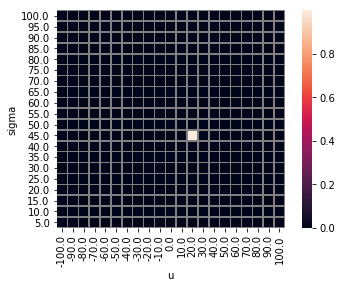

In [60]:
ax = sns.heatmap(rand_1000_post_unlog,                 # takes a 2D array of data
                 xticklabels=gridcols,  #   ... set custom x axis labels
                 yticklabels=gridrows,  #   ... set custom y axis labels
                 cbar=True,           #   ... turn off the default color scale bar
                 square=True,          #   ... force the plot to be square
                 linecolor='grey',     #   ... set grid line color
                 linewidth=0.5)        #   ... set grid line width
ax.set_xlabel('u')
ax.set_ylabel('sigma')

Text(72.528,0.5,'sigma')

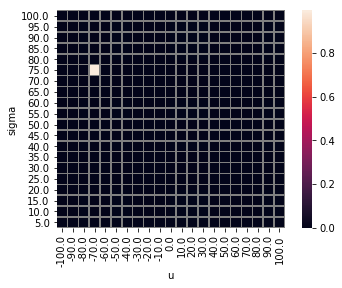

In [61]:
ax = sns.heatmap(rand_2000_post_unlog,                 # takes a 2D array of data
                 xticklabels=rand_2000_gridcols,  #   ... set custom x axis labels
                 yticklabels=rand_2000_gridrows,  #   ... set custom y axis labels
                 cbar=True,           #   ... turn off the default color scale bar
                 square=True,          #   ... force the plot to be square
                 linecolor='grey',     #   ... set grid line color
                 linewidth=0.5)        #   ... set grid line width
ax.set_xlabel('u')
ax.set_ylabel('sigma')

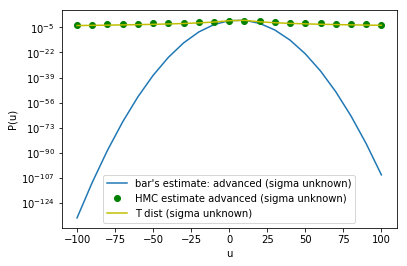

In [62]:
# The bar's rules for determining fair odds.
PrA = probdist_advanced(small_X, gridcols)
PrT = tdist_advanced(small_X, gridcols)
PrHMC = small_X_marg_adv


# Set up our graphical display.
plt.semilogy(gridcols, PrA, label="bar's estimate: advanced (sigma unknown)")
plt.semilogy(gridcols, PrHMC, "go", label="HMC estimate advanced (sigma unknown)")
plt.semilogy(gridcols, PrT, "y-", label="T dist (sigma unknown)")

plt.xlabel('u') 
plt.ylabel('P(u)')
plt.legend(loc='best')
plt.show()

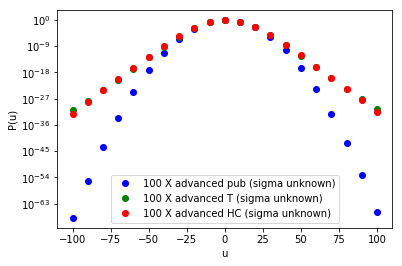

In [63]:
PrA = probdist_advanced(rand_100_X, gridcols)
PrT = tdist_advanced(rand_100_X, gridcols)

plt.semilogy(gridcols, PrA, "bo", label="100 X advanced pub (sigma unknown)")
plt.semilogy(gridcols, PrT, "go", label="100 X advanced T (sigma unknown)")
plt.semilogy(gridcols, rand_100_marginal, "ro", label="100 X advanced HC (sigma unknown)")

plt.xlabel('u') 
plt.ylabel('P(u)')
plt.legend(loc='best')
plt.show()

/Users/Hailey/anaconda/envs/python3/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:3845: RuntimeWarning: overflow encountered in power
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)


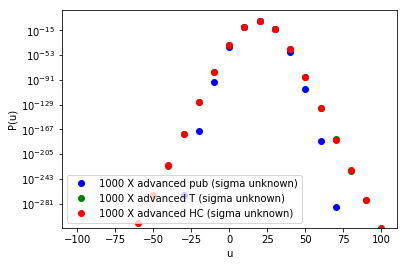

In [64]:
PrA = probdist_advanced(rand_1000_X, gridcols)
PrT = tdist_advanced(rand_1000_X, gridcols)

plt.semilogy(gridcols, PrA, "bo", label="1000 X advanced pub (sigma unknown)")
plt.semilogy(gridcols, PrT, "go", label="1000 X advanced T (sigma unknown)")
plt.semilogy(gridcols, rand_1000_marginal, "ro", label="1000 X advanced HC (sigma unknown)")

plt.xlabel('u') 
plt.ylabel('P(u)')
plt.legend(loc='best')
plt.show()

/Users/Hailey/anaconda/envs/python3/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:3845: RuntimeWarning: overflow encountered in power
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)


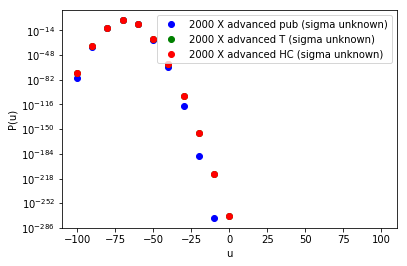

In [65]:
PrA = probdist_advanced(rand_2000_X, gridcols)
PrT = tdist_advanced(rand_2000_X, gridcols)

plt.semilogy(gridcols, PrA, "bo", label="2000 X advanced pub (sigma unknown)")
plt.semilogy(gridcols, PrT, "go", label="2000 X advanced T (sigma unknown)")
plt.semilogy(gridcols, rand_2000_marginal, "ro", label="2000 X advanced HC (sigma unknown)")

plt.xlabel('u') 
plt.ylabel('P(u)')
plt.legend(loc='best')
plt.show()

## What's the advantage?

The pub has a ground truth they are using as the standard deviation and as we calculate the standard error, the standard error will become smaller and smaller as n increases, thus the pub does "better" at predicting the location of the dart when there are more samples, as can be seen in the graphs in the cells above. The posterior probability distributions plotted show convergence between the two advanced methods (HC/HMC and pub) when n is larger. Additionally, the function I have made is overlapping with the T distribution, but our sigmas are discrete and so the curves are not exactly the same distribution. 

In [66]:
# The bar's rules for determining fair odds.
PrA = probdist_advanced(small_X, gridcols)
PrT = tdist_advanced(small_X, gridcols)
PrHMC = small_X_marg_adv

In [67]:
#8 is the index for the true mu - 20 - bar prediction
PrA[8]

7.479990834736474e-09

In [68]:
#8 is the index for the true mu - 20 - T distribution prediction
PrT[8]

0.010437602935893214

In [69]:
#8 is the index for the true mu - 20 - my prediction
PrHMC[8]

0.027339054633827804

Specifically, for the game we have been given (with true sigma, mu and our X values - small X) the odds of winning are actually higher than what the bar would predict. So, for a small number of samples the bar does not predict very well how likely one is to win, but given many more samples, the bar's standard error estimate becomes closer to the true normal distribution. We want to bet when there is a small sample error, since the bar gives us unlikely odds. 